## 1. MNIST Digits
#### MNIST 손글씨 이미지를 딥러닝을 이용하여 분류하시오.

In [1]:
from keras.datasets import mnist
from tensorflow import keras
from keras import models 
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import time

(X, y), (X_test, y_test) = mnist.load_data()

In [2]:
print(np.shape(X))
print(np.shape(y))
print(np.shape(X_test))
print(np.shape(y_test))
print('y values:\t',y)
print('y_test values:\t',y_test)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
y values:	 [5 0 4 ... 5 6 8]
y_test values:	 [7 2 1 ... 4 5 6]


In [3]:
#Data Processing
#raveled
X_train=X.reshape(np.shape(X)[0],-1)
X_test=X_test.reshape(np.shape(X_test)[0],-1)


#Normalized
X_train=X_train/255
X_test=X_test/255

#vectorized
y_train=to_categorical(y)
y_test=to_categorical(y_test)

In [4]:
#model setting
net = models.Sequential()
net.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) #RELU is to handle.
net.add(layers.Dropout(0.3)) #For protecting overfitting. 0.3 is recommanded
net.add(layers.Dense(512, activation='relu')) 
net.add(layers.Dropout(0.3))
net.add(layers.Dense(512, activation='relu'))
net.add(layers.Dropout(0.3))
net.add(layers.Dense(10, activation='softmax')) 
net.compile(optimizer='nadam', #adam, nadam are recommanded
            loss='categorical_crossentropy', #For Classifiation
            metrics=['acc']) #accuarcy is good for classifiation

In [5]:
#fitting
start=time.time()

net_val=net.fit(X_train,y_train,epochs=20, batch_size=128, validation_split=0.2)

print("spending time:",abs(start-time.time())/60, ' [min]')

Epoch 1/20
375/375 [==============================] - 3s 9ms/step - loss: 0.3222 - acc: 0.8999 - val_loss: 0.1255 - val_acc: 0.9613
Epoch 2/20
375/375 [==============================] - 3s 9ms/step - loss: 0.1319 - acc: 0.9604 - val_loss: 0.0972 - val_acc: 0.9707
Epoch 3/20
375/375 [==============================] - 3s 9ms/step - loss: 0.0999 - acc: 0.9689 - val_loss: 0.0837 - val_acc: 0.9768
Epoch 4/20
375/375 [==============================] - 3s 9ms/step - loss: 0.0801 - acc: 0.9752 - val_loss: 0.0827 - val_acc: 0.9749
Epoch 5/20
375/375 [==============================] - 3s 9ms/step - loss: 0.0670 - acc: 0.9792 - val_loss: 0.0868 - val_acc: 0.9738
Epoch 6/20
375/375 [==============================] - 3s 8ms/step - loss: 0.0594 - acc: 0.9817 - val_loss: 0.0747 - val_acc: 0.9783
Epoch 7/20
375/375 [==============================] - 3s 8ms/step - loss: 0.0543 - acc: 0.9824 - val_loss: 0.0774 - val_acc: 0.9772
Epoch 8/20
375/375 [==============================] - 3s 8ms/step - loss: 0.

In [6]:
test_loss, test_acc = net.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0880 - acc: 0.9809


### Results

In [7]:
net.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5

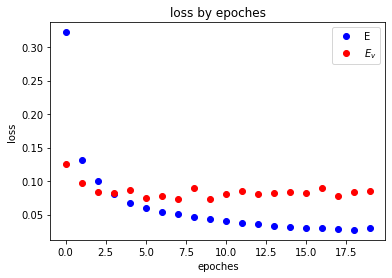

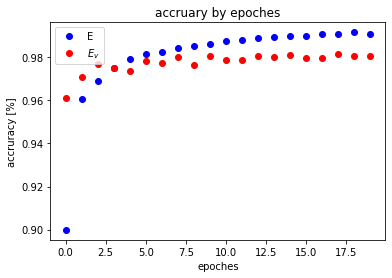

In [8]:
val_dict = net_val.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']
acc=val_dict['acc']
val_acc =val_dict['val_acc']

plt.figure('loss')
x = np.arange(0,len(loss))
plt.title("loss by epoches")
plt.xlabel("epoches") ; plt.ylabel('loss')
plt.plot(x,loss,'bo',label='E')
plt.plot(x,val_loss,'ro',label='$E_v$')
plt.legend()

plt.figure('acc')
x = np.arange(0,len(loss))
plt.title("accruary by epoches")
plt.xlabel("epoches") ; plt.ylabel('accruracy [%]')
plt.plot(x,acc,'bo',label='E')
plt.plot(x,val_acc,'ro',label='$E_v$')
plt.legend()

In [9]:
results=net.predict(X_test)

In [10]:
import pandas as pd

df=pd.DataFrame({"answer":np.argmax(y_test,axis=1),"Predicted":np.argmax(results,axis=1)})

print("accuracy:", test_acc*100,'%')
df

accuracy: 98.089998960495 %


,answer,Predicted
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


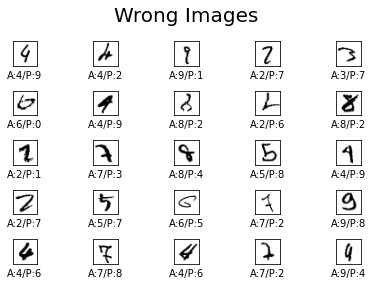

In [11]:
Wrong_arg=[]
for idx,val in enumerate(df.answer!=df.Predicted):
    if val ==1:
        Wrong_arg.append(idx)
Wrong_img=X_test[Wrong_arg].reshape(-1,28,28)

num_show=5**2 #the amount of image that you wanna see. should be squre of nature number.
for count,(arg,img) in enumerate(zip(Wrong_arg[:num_show],Wrong_img[:num_show])):
    plt.subplot(int(np.sqrt(num_show)),int(np.sqrt(num_show)),count+1)
    plt.xticks([]); plt.yticks([])
    plt.grid(False)
    plt.xlabel('A:'+str(df.answer[arg])+'/P:'+str(df.Predicted[arg]))
    plt.imshow(img,cmap='binary')

plt.suptitle("Wrong Images",fontsize=20)
plt.tight_layout()
plt.show()

정확도가 98%로 기존의 Softmax regression 보다 성능이 훨씬 좋아졌다. 하지만 그만큼 더 많은 시간이 걸린다. 그래도 Support Vector Machine, Random Forest, Decision Tree 같은 model 보다는 훨씬 빠르다.\
한편, 틀린 이미지를 보면, 확실히 구분이 어려운 이미지가 있는 가하면, 구분하기 쉬운 이미지도 있다. 따라서 아직도 모델을 발전시킬 가능성은 있어보인다. (A가 answer를 뜻하며, P가 Prediction을 뜻한다.)

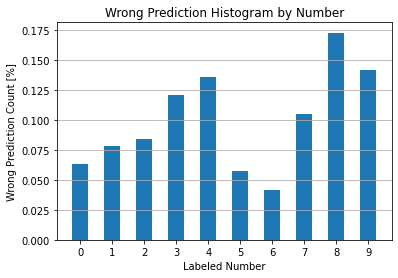

Total wrong Number: 191


In [12]:
plt.title("Wrong Prediction Histogram by Number")
plt.xlabel("Labeled Number")
plt.ylabel("Wrong Prediction Count [%]")
plt.xticks(range(0,11))
plt.hist(df.answer[Wrong_arg],bins=range(0,11),align='left',rwidth=0.5,density=True)
plt.grid(axis="y")
plt.show()

print("Total wrong Number:",np.sum(df.answer!=df.Predicted))

위 모델에서는 숫자 9가 제일 맞추기 어려운 숫자이고, 숫자 6이 제일 맞추기 쉬운 숫자로 나온다. 실제로 사람 글씨를 생각해보면, 5와 4, 8과9가 필기체에 따라 햇갈리는 경우가 종종 있다. 실제로 나도 5를 9나 8로 자주 오해를 받아서 필기체를 고친 적이 있다.

## 2. Fashion MNIST
### MNIST 패션 이미지를 딥러닝을 이용하여 분류하시오.
MNIST 패션데이터는 10종류의 60000개 패션 학습데이터와 10000개의 테스트 데이터로 구성되어 있습니다. 각각의 레이블의 의미는 다음과 같습니다.

|label|	Description|
|----|------------|
|0	|T-shirt/top|
|1	|Trouser|
|2	|Pullover|
|3	|Dress|
|4	|Coat|
|5	|Sandal|
|6	|Shirt|
|7	|Sneaker|
|8	|Bag|
|9	|Ankle boot|

손글씨 데이터 분류처럼 패션 데이터를 딥러닝을 이용하여 분류하시오.

In [13]:
from keras.datasets import fashion_mnist

(X2, y2), (X2_test, y2_test) = fashion_mnist.load_data()

In [14]:
print(np.shape(X2))
print(np.shape(y2))
print(np.shape(X2_test))
print(np.shape(y2_test))
print('y values:\t',y2)
print('y_test values:\t',y2_test)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
y values:	 [9 0 0 ... 3 0 5]
y_test values:	 [9 2 1 ... 8 1 5]


In [15]:
#Data Processing
#raveled
X2_train=X2.reshape(X2.shape[0],-1)
X2_test=X2_test.reshape(X2_test.shape[0],-1)

#Normalized
X2_train=X2_train.astype('float32')/255.0
X2_test=X2_test.astype('float32')/255.0

#vectorized
y2_train=to_categorical(y2)
y2_test=to_categorical(y2_test)

In [16]:
#model setting
net2 = models.Sequential()
net2.add(layers.Dense(512, activation='relu',input_shape=(28*28,)))
net2.add(layers.Dropout(0.3))
net2.add(layers.Dense(512, activation='relu'))
net2.add(layers.Dropout(0.3))
net2.add(layers.Dense(512, activation='relu'))
net2.add(layers.Dropout(0.3))
net2.add(layers.Dense(10, activation='softmax')) 
net2.compile(optimizer='nadam',
            loss='categorical_crossentropy',
            metrics=['acc'])

In [17]:
#fitting
start=time.time()

net_val2=net2.fit(X2_train,y2_train,batch_size=128,epochs=20,validation_split=0.2)

print("spending time:",abs(start-time.time())/60, ' [min]')

Epoch 1/20
375/375 [==============================] - 3s 8ms/step - loss: 0.5964 - acc: 0.7829 - val_loss: 0.3936 - val_acc: 0.8554
Epoch 2/20
375/375 [==============================] - 3s 7ms/step - loss: 0.4177 - acc: 0.8450 - val_loss: 0.3705 - val_acc: 0.8642
Epoch 3/20
375/375 [==============================] - 3s 7ms/step - loss: 0.3816 - acc: 0.8617 - val_loss: 0.3487 - val_acc: 0.8756
Epoch 4/20
375/375 [==============================] - 3s 7ms/step - loss: 0.3561 - acc: 0.8705 - val_loss: 0.3346 - val_acc: 0.8810
Epoch 5/20
375/375 [==============================] - 3s 7ms/step - loss: 0.3375 - acc: 0.8761 - val_loss: 0.3260 - val_acc: 0.8777
Epoch 6/20
375/375 [==============================] - 3s 7ms/step - loss: 0.3224 - acc: 0.8809 - val_loss: 0.3232 - val_acc: 0.8813
Epoch 7/20
375/375 [==============================] - 3s 7ms/step - loss: 0.3149 - acc: 0.8827 - val_loss: 0.3270 - val_acc: 0.8801
Epoch 8/20
375/375 [==============================] - 3s 7ms/step - loss: 0.

In [18]:
test_loss2, test_acc2 = net2.evaluate(X2_test,y2_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3253 - acc: 0.8859



|Layer array        |Accuracy|time    |epoch|batch size|
|:-----------------:|:------:|:------:|:---:|:--------:|
|Softmax            |84.55%  |0.32 min|20   |128       |
|D(128,r) $\to$ S   |88.08%  |0.42 min|20   |128       |
|D(/2,r)x5 $\to$ S  |87.57%  |1.10 min|20   |    64    |
|D(/2,r)x3 $\to$ S  |88.00%  |1.10 min|20   |    64    |
|D(392,r)x3 $\to$ S |88.34%  |2.68 min|20   |    64    |
|D(128,r)x3 $\to$ S |88.90%  |0.49 min|20   |    128   |
|D(128,sp)x3 $\to$ S|88.45%  |0.71 min|20   |    128   |
|D(128,ss)x3 $\to$ S|87.96%  |0.53 min|20   |    128   |
|D(128,th)x3 $\to$ S|88.32%  |0.51 min|20   |    128   |
|D(128,se)x3 $\to$ S|88.42%  |0.57 min|20   |    128   |
|D(128,er)x3 $\to$ S|88.70%  |0.57 min|20   |    128   |


D():Dense S: softmax r : RELU  sp:softplus  ss: softsign  th: tanh se: SELU er:ELU

D(/2,r)는 28x28 input을 layer가 진행될 때마다 node를 1/2 한 것이다. r는 activation function으로 RELU를 사용했다는 것을 말한다.
즉. D(node number, activation function) x (layer number)를 말한다.

한편, 여러 조합을 시도해보았지만, 89% 이상으로 정확도가 올라가지 않는다. 인터넷으로 여러 글을 찾아본 결과 현재 이미징 분류에 최적합하다는 CNN(Convolution Neural Network)도 92~94%의 성능을 내는 것 같다. Fashion MNIST는 MNIST Digits 보다 분류가 까다로운 dataset 같다. 확실히 epoch를 100까지 올려보았을 때, 성능이 89%까지 나왔지만, 그 이상 돌려도 큰 변화는 찾아볼 수가 없었다.

### Results

In [19]:
net2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

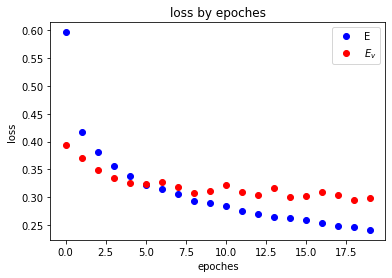

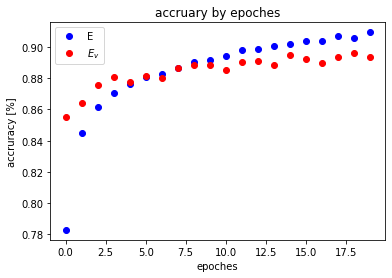

In [20]:
val_dict2 = net_val2.history
loss2 = val_dict2['loss']
val_loss2 = val_dict2['val_loss']
acc2=val_dict2['acc']
val_acc2 =val_dict2['val_acc']

plt.figure('loss2')
x = np.arange(0,len(loss2))
plt.title("loss by epoches")
plt.xlabel("epoches") ; plt.ylabel('loss')
plt.plot(x,loss2,'bo',label='E')
plt.plot(x,val_loss2,'ro',label='$E_v$')
plt.legend()

plt.figure('acc2')
x = np.arange(0,len(loss2))
plt.title("accruary by epoches")
plt.xlabel("epoches") ; plt.ylabel('accruracy [%]')
plt.plot(x,acc2,'bo',label='E')
plt.plot(x,val_acc2,'ro',label='$E_v$')
plt.legend()

In [21]:
results2=net2.predict(X2_test)

df2=pd.DataFrame({"answer":np.argmax(y2_test,axis=1),"Predicted":np.argmax(results2,axis=1)})

df2

,answer,Predicted
0,9,9
1,2,2
2,1,1
3,1,1
4,6,0
...,...,...
9995,9,9
9996,1,1
9997,8,8
9998,1,1


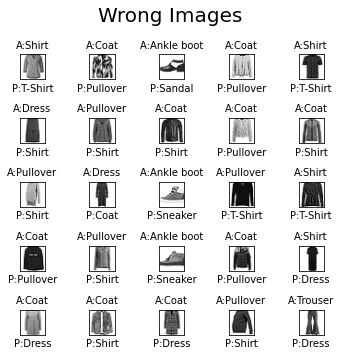

In [22]:
name=["T-Shirt","Trouser","Pullover",'Dress','Coat','Sandal','Shirt','Sneaker',"Bag","Ankle boot"]

Wrong_arg2=[]
for idx,val in enumerate(df2.answer!=df2.Predicted):
    if val ==1:
        Wrong_arg2.append(idx)
Wrong_img2=X2_test[Wrong_arg2].reshape(-1,28,28)

num_show=5**2 #the amount of image that you wanna see. should be squre of nature number.
plt.figure(figsize=(int(np.sqrt(num_show)),int(np.sqrt(num_show))))
for count,(arg,img) in enumerate(zip(Wrong_arg2[:num_show],Wrong_img2[:num_show])):
    plt.subplot(int(np.sqrt(num_show)),int(np.sqrt(num_show)),count+1)
    plt.xticks([]); plt.yticks([])
    plt.grid(False)
    plt.title('A:'+name[df2.answer[arg]],fontsize=10)
    plt.xlabel('P:'+name[df2.Predicted[arg]])
    plt.imshow(img,cmap='binary')

plt.suptitle("Wrong Images",fontsize=20)
plt.tight_layout()
plt.show()

맞추지 못한 항목들을 보면, 사람이 분류했다고 하면 믿기 않을 항목도 있다. 확실히 해당 분야의 분류에 관해서는 모델을 더 발전 시킬 필요가 있어 보인다. 특히, 이미지 분류에 성능이 좋다는 CNN을 사용하면 더 좋은 스코어를 줄 것 같다. (여기서 CNN의 Convolution은 kernel을 이용해서 이미지를 filtering 하는 것을 말한다.)

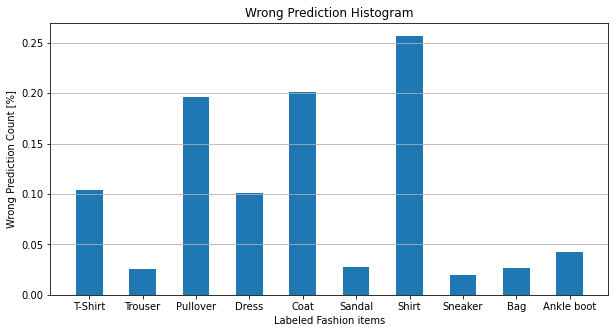

Total wrong Number: 1141


In [23]:
plt.figure(figsize=(10,5))
plt.title("Wrong Prediction Histogram")
plt.xlabel("Labeled Fashion items")
plt.ylabel("Wrong Prediction Count [%]")
plt.hist(df2.answer[Wrong_arg2],bins=range(0,11),align='left',rwidth=0.5,density=True)
plt.xticks(range(0,10),name)
plt.grid(axis="y")
plt.show()

print("Total wrong Number:",np.sum(df2.answer!=df2.Predicted))

해당 모델에서는 Shirt가 맞추기 가장 힘든 항목이며, Trouser, Sandal, Sneaker, Bag, Ankle boot는 비교적 분류하기 쉬운 항목인 것 같다.

딥러닝을 통한 분류는 데이터 양이 많더라도 빠르게 진행되며, 코드의 작성도 keras 모듈 덕에 굉장히 쉽다. 또한, 교수님의 말씀대로 hidden layer가 어느 정도 data를 engineering 해준다. 그렇지만, data를 어떻게 engineering을 해주는지 알 수 없어서 (layer 수, node 개수, activation function 종류, batch size)등을 아무런 기준도 없이 조합해 봐야 한다는 단점이 있다. 이는 단지 특정 형태는 어떤 데이터와 잘 맞는다 라는 경험적인 추측이 한계인 것 같다. 따라서 경험이 없이는 어떤 기준으로 layer를 설계해야 하는지 전혀 감이 잡히질 않는다는 단점이 있는 것 같다.